### Importing essential Libraries

In [40]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing, neighbors
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing & Cleaning Dataset 

In [50]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.replace('?', np.nan, inplace = True)
df.drop(['id'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   clump_thickness        683 non-null    int64 
 1   unif_cell_size         683 non-null    int64 
 2   unif_cell_shape        683 non-null    int64 
 3   marg_adhesion          683 non-null    int64 
 4   single_epith_cel_size  683 non-null    int64 
 5   bare_nuclei            683 non-null    object
 6   bland_chrom            683 non-null    int64 
 7   norm_nucleoli          683 non-null    int64 
 8   mitoses                683 non-null    int64 
 9   class                  683 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [51]:
df['bare_nuclei'] = df['bare_nuclei'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   clump_thickness        683 non-null    int64
 1   unif_cell_size         683 non-null    int64
 2   unif_cell_shape        683 non-null    int64
 3   marg_adhesion          683 non-null    int64
 4   single_epith_cel_size  683 non-null    int64
 5   bare_nuclei            683 non-null    int32
 6   bland_chrom            683 non-null    int64
 7   norm_nucleoli          683 non-null    int64
 8   mitoses                683 non-null    int64
 9   class                  683 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


### Split the class as a dependent variable

In [52]:
x = np.array(df.drop(['class'], axis = 1))
y = np.array(df['class'])

### Cross Validation

In [53]:
scores =  cross_validate(neighbors.KNeighborsClassifier(), x, y, cv=5, return_estimator = True)

In [54]:
scores

{'fit_time': array([0.0029881 , 0.00103736, 0.00099564, 0.00103736, 0.00099516]),
 'score_time': array([0.01001143, 0.00397873, 0.00395918, 0.00494719, 0.00399065]),
 'estimator': (KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()),
 'test_score': array([0.93430657, 0.94890511, 0.98540146, 0.99264706, 0.98529412])}

### Getting the best fit model

In [55]:
def get_model(scores):       
    z = scores["test_score"] == scores['test_score'].max()
    index = 0
    for i in range(len(z)-1):
        if z[i] == True:
            index = i
    return scores['estimator'][index]

In [56]:
model = get_model(scores)

### Pickling

In [57]:
with open('KNNmodel.pickle', 'wb') as f:
    pickle.dump(model, f)
pickle_in = open('KNNmodel.pickle', 'rb')
clf = pickle.load(pickle_in)

### Predict
- Taking a random sample

In [67]:
# Benign sample Benign == 2
sample = np.array([3,1,1,1,2,2,3,1,1])
sample = sample.reshape(len(sample), -1)

In [59]:
y_pred = model.predict(sample)
y_pred[0]

2

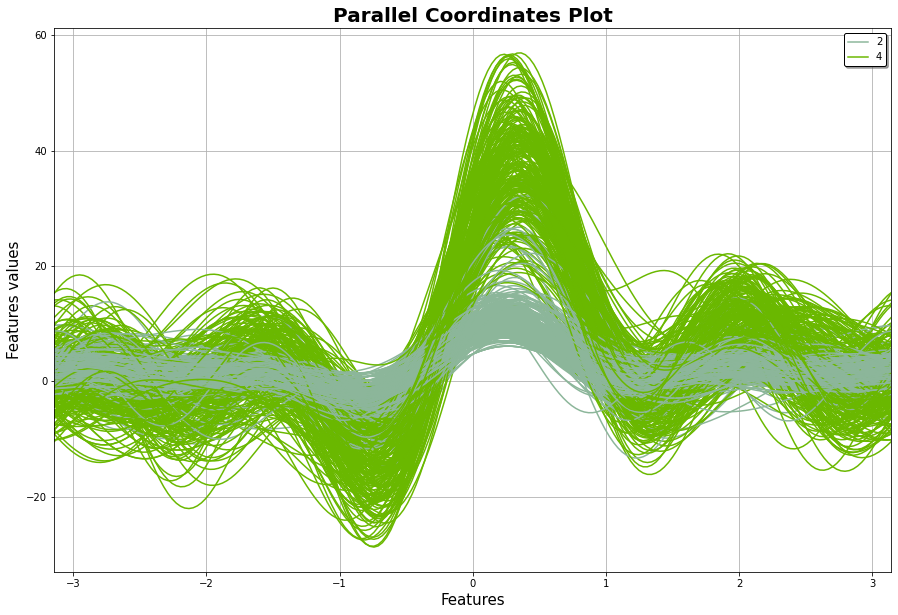

In [69]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df, "class")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 10}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()
